In [23]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt

Question #1

In [24]:
def matrix_gen(m,n):
    Rm = np.arange(m)
    Rn = np.arange(n)
    return np.array([[(10)*np.random.random() for i in Rn] for j in Rm])

def M_Gram_Schmidt(A):
    m,n = len(A),len(A[0])
    Q = A.copy()
    r1 = list(np.arange(0,n))
    R = np.array([[0.0 for i in r1] for j in r1])
    for i in np.arange(0,n):
        R[i,i] = la.norm(Q[:,i])
        Q[:,i] = Q[:,i] / R[i,i]
        for j in np.arange(i+1,n):
            R[i,j] = np.dot(Q[:,j],Q[:,i])
            Q[:,j] = Q[:,j] - R[i,j]*Q[:,i]
    return A,Q,R

m,n = 100,100
A,Q,R = M_Gram_Schmidt(matrix_gen(m,n))
b = np.array([np.random.random() for i in np.arange(n)])
x = np.array(np.dot(np.dot(np.linalg.inv(R),np.transpose(Q)),b))
print("Solution for x:")
print("Check (Ax - b = 0):")
print(la.norm(np.dot(A,x) - b) < 0.0001)

Solution for x:
Check (Ax - b = 0):
True


Question #2

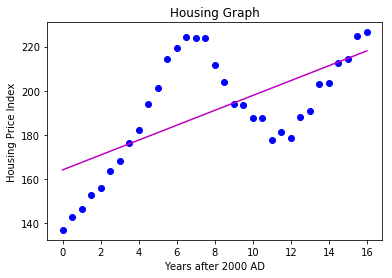

In [25]:
data = np.load("housing.npy")
X = np.array([[1,i] for i in data[:,0]])
A,Q,R = M_Gram_Schmidt(X)

b = np.array([[i] for i in data[:,1]])
xbar = np.array(np.dot(np.dot(np.linalg.inv(R),np.transpose(Q)),b))
plt.plot(data[:,0],data[:,1],'o',color='b')
plt.plot(data[:,0],np.dot(A,xbar),'-',color='m')
plt.title("Housing Graph")
plt.xlabel("Years after 2000 AD")
plt.ylabel("Housing Price Index")
plt.show()

Question #3

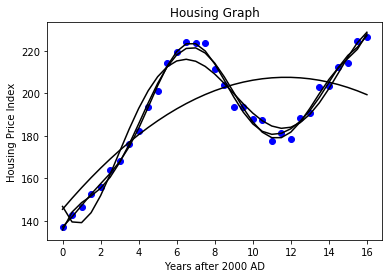

In [26]:
data = np.load("housing.npy")
X3 = np.vander(data[:,0],3)
X6 = np.vander(data[:,0],6)
X9 = np.vander(data[:,0],9)
X12 = np.vander(data[:,0],12)

A3,Q3,R3 = M_Gram_Schmidt(X3)
A6,Q6,R6 = M_Gram_Schmidt(X6)
A9,Q9,R9 = M_Gram_Schmidt(X9)
A12,Q12,R12 = M_Gram_Schmidt(X12)
b = np.array([[i] for i in data[:,1]])

xbar3 = np.array(np.dot(np.dot(np.linalg.inv(R3),np.transpose(Q3)),b))
A6,Q6,R6 = M_Gram_Schmidt(X6)
xbar6 = np.array(np.dot(np.dot(np.linalg.inv(R6),np.transpose(Q6)),b))
A9,Q9,R9 = M_Gram_Schmidt(X9)
xbar9 = np.array(np.dot(np.dot(np.linalg.inv(R9),np.transpose(Q9)),b))
A12,Q12,R12 = M_Gram_Schmidt(X12)
xbar12 = np.array(np.dot(np.dot(np.linalg.inv(R12),np.transpose(Q12)),b))

plt.plot(data[:,0],data[:,1],'o',color='b')
plt.plot(data[:,0],np.dot(A3,xbar3),'-',color='k')
plt.plot(data[:,0],np.dot(A6,xbar6),'-',color='k')
plt.plot(data[:,0],np.dot(A9,xbar9),'-',color='k')
plt.plot(data[:,0],np.dot(A12,xbar12),'-',color='k')
plt.title("Housing Graph")
plt.xlabel("Years after 2000 AD")
plt.ylabel("Housing Price Index")
plt.show()

Question #4

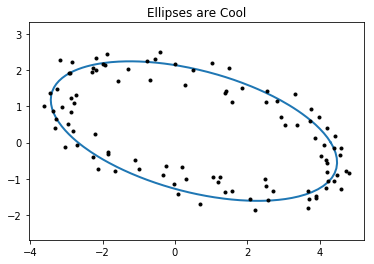

In [27]:
x,y = np.load("ellipse.npy").T
A = np.column_stack((x**2,x,x*y,y,y**2))
b = np.ones_like(x)

a,b,c,d,e = la.lstsq(A,b)[0]

def plot_ellipse(a,b,c,d,e):
    theta = np.linspace(0,2*np.pi,200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A))/(2*A)
    plt.plot(r*cos_t,r*sin_t,lw=2)
    plt.gca().set_aspect("equal","datalim")
    
p = plot_ellipse(a,b,c,d,e)
plt.plot(x,y,'.',color='k')
plt.title("Ellipses are Cool")
plt.show()

Question #5

In [45]:
def powermethod(A):
    m,n = A.shape
    x = 10*np.random.randn(n)
    x = x/la.norm(x)
    e = 0.0001
    i = 0
    xt = x
    while la.norm(xt - x) > e or i < 10000:
        xt = np.dot(A,x)
        xt = xt / la.norm(xt)
        x = xt
        i = i + 1
    return np.dot(np.dot(x,A),x), x

A = matrix_gen(5,5)
sig_m, vec_m = powermethod(A)
eigs, vecs = la.eig(A)
loc = np.argmax(eigs)
lamb, x = eigs[loc], vecs[:,loc]
np.allclose(A @ vec_m,sig_m * vec_m)
print(lamb, x)
print(sig_m, vec_m)

(23.2435908093+0j) [-0.45484939 -0.37296656 -0.29088316 -0.54586083 -0.52099033]
23.2435908093 [-0.45484939 -0.37296656 -0.29088316 -0.54586083 -0.52099033]


Question #6

In [59]:
def Hessenberg(A):
    m,n = len(A),len(A[0])
    H = A.copy()
    Q = np.eye(m)
    for k in np.arange(n-2):
        u = H[k+1:,k].copy()
        u[0] = u[0] + (abs(u[0])/u[0])*la.norm(u)
        u = u / la.norm(u)
        H[k+1:,k:] = H[k+1:,k:] - 2*np.outer(u,np.dot(u,H[k+1:,k:]))
        H[:,k+1:] = H[:,k+1:] - 2*np.outer(np.dot(H[:,k+1:],u),u)
        Q[k+1:,:] = Q[k+1:,:] - 2*np.outer(u,np.dot(u,Q[k+1:,:]))
        return A,H,np.transpose(Q)

def prob6(A):
    m,n = A.shape
    S_store,S,Q = Hessenberg(A)
    test = 1
    k = 0
    while la.norm(S - S_store) > 0.01:
        S_store,Q,R = M_Gram_Schmidt(S)
        S = R @ Q
        print(la.norm(S-S_store))
    eigs = []
    return S

prob6(A)

32.2577751575
17.6326491548
10.6766502794
11.9164937732
11.9219484586
11.7603712692
12.4142220966
11.8094473167
12.6130978103
11.8396968923
12.7393320126
11.8570966422
12.79303788
11.8784976737
12.7523073707
11.9139999629
12.64502376
11.9626439645
12.5261625716
12.0156451299
12.4284741367
12.0640691553
12.3579630303
12.1035316549
12.3096186031
12.1335774981
12.2769981859
12.1555746686
12.2550217085
12.171318951
12.2401647703
12.1824391425
12.2300746661
12.1902313072
12.2231923445
12.1956654371
12.2184808955
12.1994443364
12.2152460063
12.2020679225
12.213019592
12.2038879114
12.2114842332
12.2051500922
12.2104236642
12.2060255151
12.2096899921
12.2066329149
12.2091817872
12.2070545893
12.2088293257
12.2073475369
12.2085845892
12.2075512232
12.208414456
12.2076929761
12.2082960482
12.2077917249
12.2082135443
12.2078605883
12.20815599
12.2079086636
12.2081157926
12.2079422649
12.2080876836
12.2079657775
12.2080680036
12.2079822508
12.2080542076
12.2079938065
12.208044524
12.208001923
12.

12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.208

12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.208

12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.208

12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.208

12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.208

12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.208

12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.2080213726
12.208

KeyboardInterrupt: 